# Evaluation Project - 4

## Global Power Plant Database

## Problem Statement:

Description:

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

## Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories.

Prediction : Make two prediction 1) Primary Fuel 2) capacity_mw

## This project aims to build define the "Fuel Type" attribute of our database based on common fuel categories and "Megawatts Capacity" based on electrical generating capacity in megawatts.

# 1: "primary_fuel" is a target variable

# Importing all Usefull libraries:

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Loading the dataset:

In [2]:
# Load the dataset
data=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
# check the shape of the dataset
data.shape

(907, 27)

## The dataset contains the detalis of Global Power Plant. This dataset is comprised of 27 columns including two target variables capacity_mw and primary_fuel(Fuel_Type) where we need to predict both capacity_mw and Fuel Type.So we have a total of 907 rows and 27 columns

In [4]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
#let us chek the datatypes of our features
data.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

## 12 object data types and 14 numerical data types

In [7]:
data.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

## This means Coloumns with No Values other_fuel, weep_id, generation_gwh_2019, estimated_generation_gwh,we need to delete these coloumns

## similarly columns with only sigle unique values country, country long, other_fuel2,year_of_capacity_data, generation_data_source, so we will remove it in comimng steps

In [8]:
# chech null values:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

# Removing Irrelavent Features

In [9]:
#removing country and Country_long containing same value for all coloumns so they are not relavent
data.drop(columns=["country","country_long"],axis=1,inplace=True)

In [10]:
# Dropping irrelevant columns
data.drop(columns=["other_fuel2", "year_of_capacity_data","generation_gwh_2013","other_fuel3","wepp_id","generation_gwh_2019","estimated_generation_gwh"], axis=1, inplace=True)

In [11]:
data.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'commissioning_year', 'owner', 'source',
       'url', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [12]:
# Now we can remove name as each name of caompany have gppd_indr So we can remove either one
data.drop("name",axis=1,inplace=True)

In [13]:
# Now let us check the unique value again 
data.nunique()

gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_data_source      1
dtype: int64

In [14]:
data['generation_data_source'].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [15]:
#so we can remove the same also
data.drop("generation_data_source",axis=1,inplace=True)

## This columns will not have any effect in our analysis so we are droping the same . also we are dropping owner column

In [16]:
data.drop("owner",axis=1,inplace=True)

In [17]:
#Now check null values again
data.isnull().sum()

gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
url                      0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

## Other fuel column have huge data missing but it is important for analysis so we will fill it with imputation techniques

<AxesSubplot:>

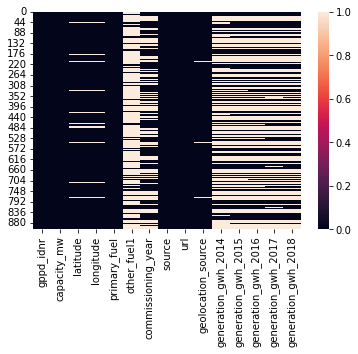

In [18]:
#Let us visualise the null values
sns.heatmap(data.isnull())

In [19]:
data.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

# Removing null values using imputation techniques.

## Most of the columns have missing values except the target variables and the feature source.
## The columns latitude has numerical data and has no skewness and outliers so we can use mean method to fill the outliers

In [20]:
# Filling missing values in lattitude using mean
data["latitude"] = data["latitude"].fillna(data["latitude"].mean())

In [21]:
#let us replace the values in generation_gwh_2014 using knn imputers
from sklearn.impute import KNNImputer
knnimp=KNNImputer(n_neighbors=3)
knn_imp=pd.DataFrame(knnimp.fit_transform(data[["capacity_mw","generation_gwh_2014"]]))
knn_imp.columns=["capacity_mw","generation_gwh_2014"]
knn_imp

,capacity_mw,generation_gwh_2014
0,2.5,16.779017
1,98.0,324.532517
2,39.2,85.185267
3,135.0,617.789264
4,1800.0,3035.550000
...,...,...
902,1600.0,3691.517167
903,3.0,16.779017
904,25.5,16.779017
905,80.0,213.394333


In [22]:
data["generation_gwh_2014"]=knn_imp["generation_gwh_2014"]
data['generation_gwh_2014']

0        16.779017
1       324.532517
2        85.185267
3       617.789264
4      3035.550000
          ...     
902    3691.517167
903      16.779017
904      16.779017
905     213.394333
906      16.779017
Name: generation_gwh_2014, Length: 907, dtype: float64

In [23]:
#similarly we will impute values in all coloumns generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
#generation_gwh_2015
knn_imp=pd.DataFrame(knnimp.fit_transform(data[["capacity_mw","generation_gwh_2015"]]))
knn_imp.columns=["capacity_mw","generation_gwh_2015"]
data["generation_gwh_2015"]=knn_imp["generation_gwh_2015"]

#generation_gwh_2016
knn_imp=pd.DataFrame(knnimp.fit_transform(data[["capacity_mw","generation_gwh_2016"]]))
knn_imp.columns=["capacity_mw","generation_gwh_2016"]
data["generation_gwh_2016"]=knn_imp["generation_gwh_2016"]

#generation_gwh_2017
knn_imp=pd.DataFrame(knnimp.fit_transform(data[["capacity_mw","generation_gwh_2017"]]))
knn_imp.columns=["capacity_mw","generation_gwh_2017"]
data["generation_gwh_2017"]=knn_imp["generation_gwh_2017"]

#generation_gwh_2018
knn_imp=pd.DataFrame(knnimp.fit_transform(data[["capacity_mw","generation_gwh_2018"]]))
knn_imp.columns=["capacity_mw","generation_gwh_2018"]
data["generation_gwh_2018"]=knn_imp["generation_gwh_2018"]


data

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,16.779017,13.293200,8.974900,22.244883,47.968950
1,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,324.532517,168.964267,253.214233,210.319783,299.083733
2,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,85.185267,112.481433,114.819683,185.902483,198.180783
3,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,3691.517167,0.994875,233.596650,865.400000,686.500000
903,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,16.779017,13.293200,8.974900,22.244883,47.968950
904,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,16.779017,13.293200,8.974900,22.244883,47.968950
905,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,213.394333,187.315383,216.123950,243.171367,256.620450


In [24]:
# Replacing the null value by its mode Oil
data["other_fuel1"] = data["other_fuel1"].fillna(data["other_fuel1"].mode()[0])

In [25]:
# Filling null values by its mode WRI
data["geolocation_source"] = data["geolocation_source"].fillna(data["geolocation_source"].mode()[0])

In [26]:
# Filling null values using their median values
data["longitude"] = data["longitude"].fillna(data["longitude"].median())
data["commissioning_year"] = data["commissioning_year"].fillna(data["commissioning_year"].median())

In [27]:
#now check is there any null value present
data.isnull().sum()

gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
url                    0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

<AxesSubplot:>

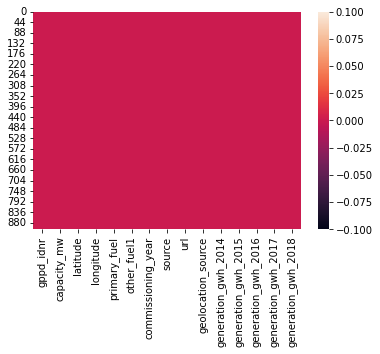

In [29]:
# Now let us visualise the image
sns.heatmap(data.isnull())

* Let us change the commisioning_year to age of power plant,

In [30]:
data['Powerplant_age']=2019-data['commissioning_year']
data.drop('commissioning_year',axis=1,inplace=True)
data

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,16.779017,13.293200,8.974900,22.244883,47.968950,8.0
1,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,324.532517,168.964267,253.214233,210.319783,299.083733,18.0
2,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,85.185267,112.481433,114.819683,185.902483,198.180783,18.0
3,IND0000001,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,http://www.cea.nic.in/,WRI,3691.517167,0.994875,233.596650,865.400000,686.500000,3.0
903,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,16.779017,13.293200,8.974900,22.244883,47.968950,18.0
904,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,16.779017,13.293200,8.974900,22.244883,47.968950,18.0
905,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,213.394333,187.315383,216.123950,243.171367,256.620450,18.0


## Url is also irrelevant for prediction so we can remove that also

In [31]:
data.drop('url',axis=1,inplace=True)

# Statistical Description :

In [32]:
# Statistical summary of dataset
data.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1216.741950,1225.073916,1247.908108,1294.299953,1348.291762,20.271224
std,590.085456,6.079148,4.815073,2944.274717,3119.361453,3138.569942,3187.953881,3293.148855,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,16.725000,17.072000,74.388900,16.779017,13.293200,8.974900,22.244883,47.968950,16.000000
50%,59.200000,21.281800,76.719500,171.853083,139.546801,131.021600,128.822650,133.912800,18.000000
75%,385.250000,25.176450,79.206100,926.055500,735.113025,780.149650,817.977250,810.733240,21.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,92.000000


## conclusion:

1.The counts of columns are same which means there are no missing values present in the dataset.

2.The mean is more than the median(50%) in all the columns except latitude which means they are skewed to right.

3.The median is bit greater than the mean in the column latitude which means it is skewed to left.

4.From the difference between maximum and 75% percentile we can infer that there are huge outliers present in most of the columns, will remove them using appropriate methods before building our model.

5.The minimum capacity of the power plant is zero and maximum in 4760 and there is huge difference in mean and standard deviation.

## sepration of categorical and numerical

In [33]:
# checking for categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['gppd_idnr', 'primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [34]:
# Now checking for numerical columns
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Powerplant_age']


# DATA VISUALIZATION:

## Univariate Analysis Plotting

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


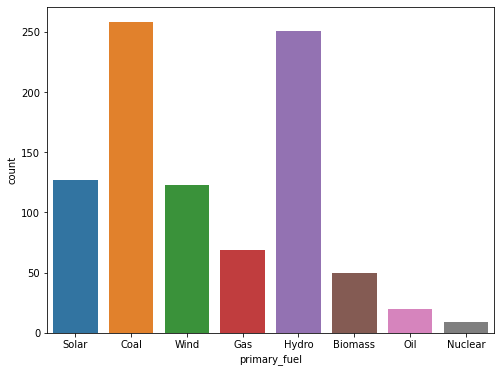

In [35]:
# Visualizing the types of fuel in primary_fuel
print(data["primary_fuel"].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(data["primary_fuel"])
plt.show()

## From above,we can identify that coal and Hydro were highly used. wind and solar energy were used in some places , gas and biomass were used in few whereas nuclear power are very low in number

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


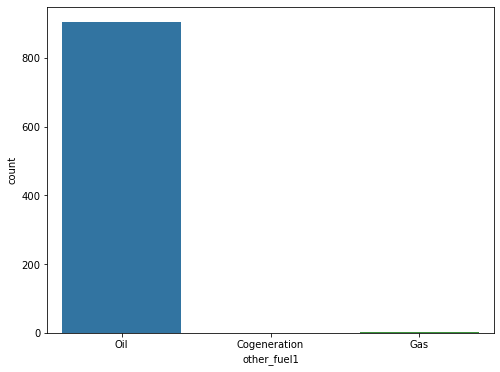

In [36]:
# Visualizing the counts of other fuel
print(data["other_fuel1"].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(data["other_fuel1"])
plt.show()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


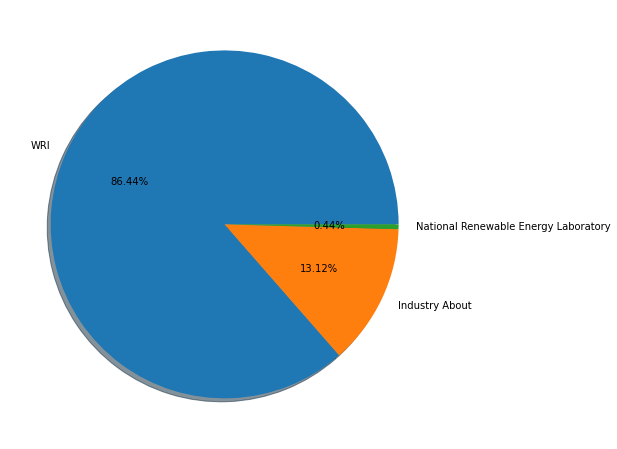

In [37]:
# Visualizing the counts of geolocation source
print(data["geolocation_source"].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(data['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

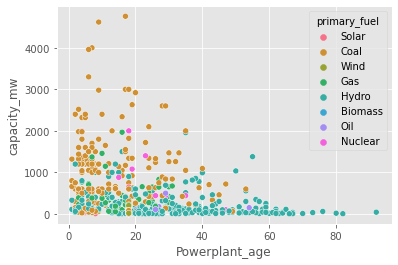

In [38]:
# Bivarient plotting u
plt.style.use('ggplot')
sns.scatterplot(x = "Powerplant_age", y = "capacity_mw",hue='primary_fuel', data = data)
plt.show()

## Old Power plants were using gas and hydro mainly, coal type is using to produce high capacity.

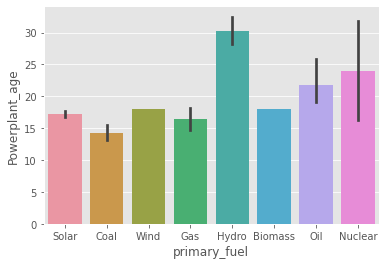

In [39]:
#lets have a look on relation between fuel used and powerplant age
sns.barplot(x = "primary_fuel", y = "Powerplant_age", data = data)
plt.show()

## As earlier we have noticed that hydro power is used in old plants.

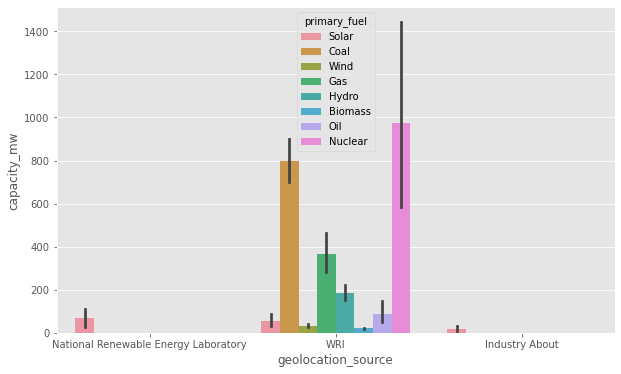

In [40]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = data,hue='primary_fuel')
plt.show()

The capacity of geolocation source WRI is maximum which has capacity more tahn 350 mega watts. The geolacation source Industry About has less capacity. In WRI all sources of power is used

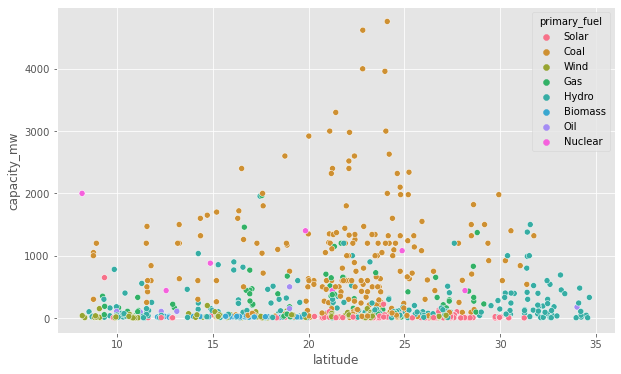

In [41]:
# Let's check how the capacity is reated to latitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
sns.scatterplot(data['latitude'],data["capacity_mw"],hue=data['primary_fuel']);

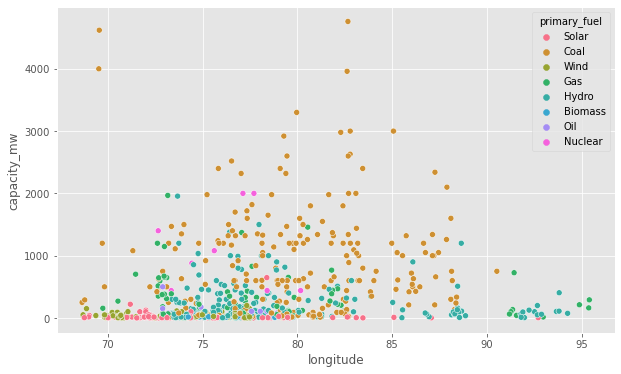

In [42]:
# Let's check how the longitude related to the capacity of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')

sns.scatterplot(data['longitude'],data["capacity_mw"],hue=data['primary_fuel']);

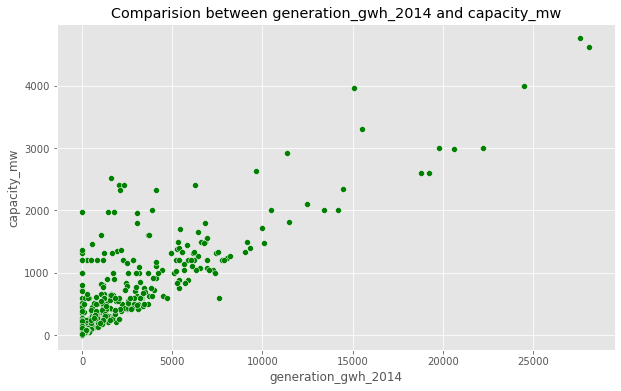

In [43]:
#Lets check the capacity of the plant in generation_gwh_2014
plt.figure(figsize = (10,6))
plt.title("Comparision between generation_gwh_2014 and capacity_mw")
sns.scatterplot(x = "generation_gwh_2014", y = "capacity_mw", data = data,color="g")
plt.show()

## We can noticed the linear relationship between the feature and the label. Here the electricity generation reported for the year 2014 has capacity above 1000 mw also as the generation growth increases, the capacity of plant is also increasing moderately.

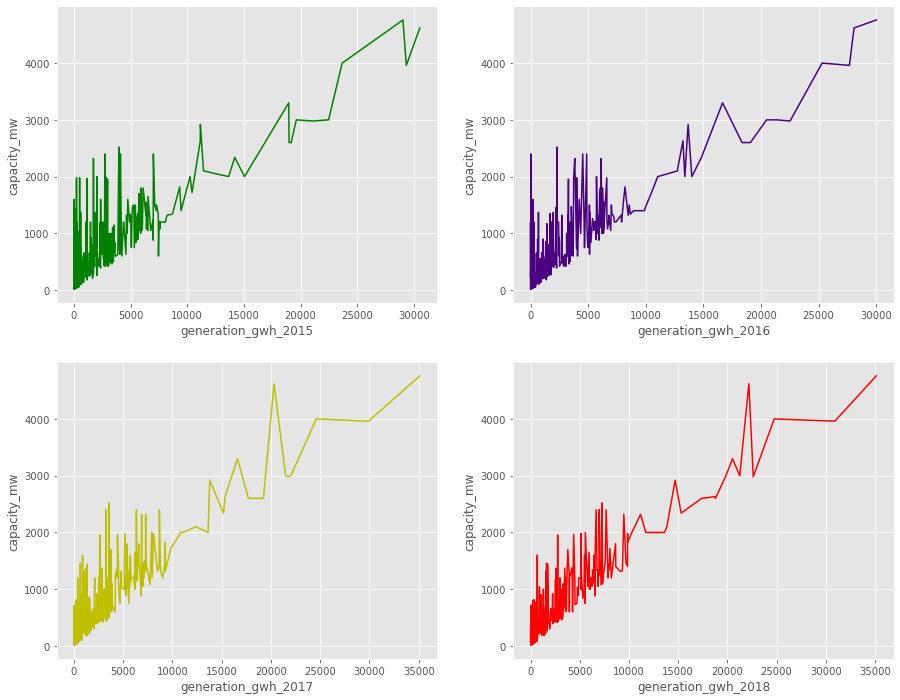

In [44]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking attrition level in Dailyrate
sns.lineplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,0],data=data,color="g")

# Checking attrition level in hourlyrate
sns.lineplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[0,1],data=data,color="indigo")

# Checking attrition level in Monthlyrate
sns.lineplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,0],data=data,color="y")

# Checking attrition level in Monthlyincome
sns.lineplot(x='generation_gwh_2018',y='capacity_mw',ax=axes[1,1],data=data,color="r")
plt.show()

## There is a positive linear relationship between the capacity and the electricity generation reported for the years mentioned.

## The plot shows how the electricity generation reported for the years 2015,2016,2017,2018 have high capacity of above 1000mw. Also power generation growth is more than 5000gwh in all the years.

## As the electricity generation growth increases, the capacity of plant is also increasing moderately.

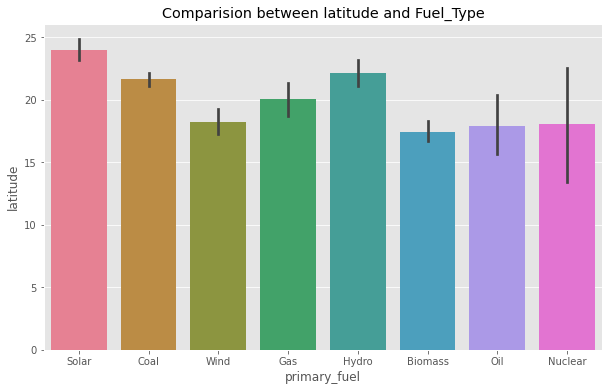

In [45]:
# Let's check how the fuel type is reated to latitude of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between latitude and Fuel_Type')
sns.barplot(data['primary_fuel'],data["latitude"],palette="husl");

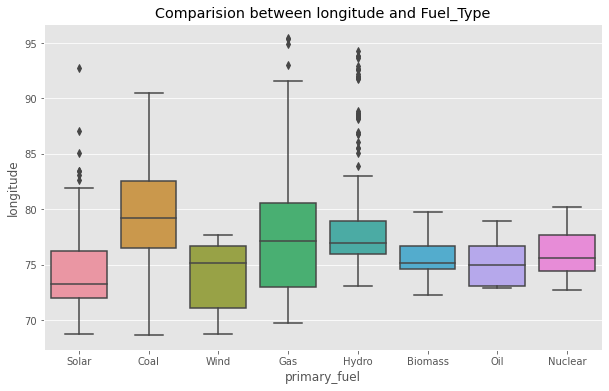

In [46]:
# Let's check how the fuel type is reated to longitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and Fuel_Type')
sns.boxplot(data['primary_fuel'],data["longitude"]);

## We can also see that there are outlier in many columns and the fuel type Gas and coal has high longitude followed by Hydro, Biomas,nuclear and oil Other fuel types have very less longitude.

## Comparison the relation between targets

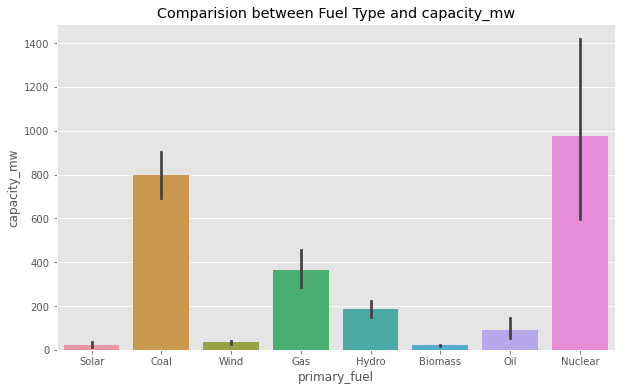

In [47]:
#Lets check the relation between Fuel Type and capacity_mw
plt.figure(figsize = (10,6))
plt.title("Comparision between Fuel Type and capacity_mw")
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = data)
plt.show()

## Even though nuclear plants are low maximum capacity is generated using nuclear type, followed by coal, as it is widely used solar, wind and biomas are very slighltly producing capacity but in future this may change

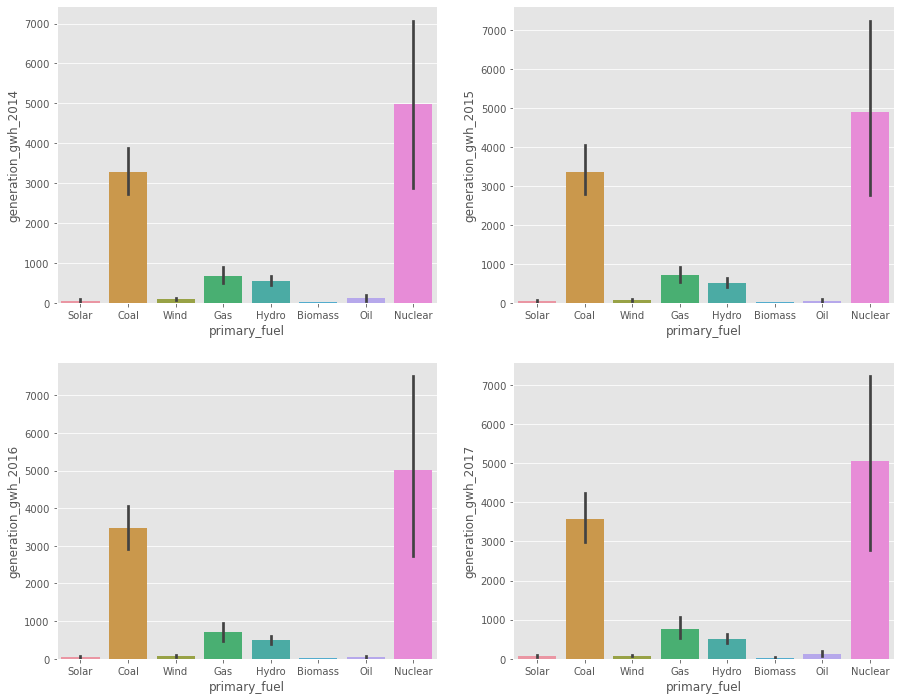

In [48]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking attrition level in Dailyrate
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,0],data=data)

# Checking attrition level in hourlyrate
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[0,1],data=data)

# Checking attrition level in Monthlyrate
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,0],data=data)

# Checking attrition level in Monthlyincome
sns.barplot(x='primary_fuel',y='generation_gwh_2017',ax=axes[1,1],data=data)
            
plt.show()

## although nuclear plant are low in number but they have more energy production every year

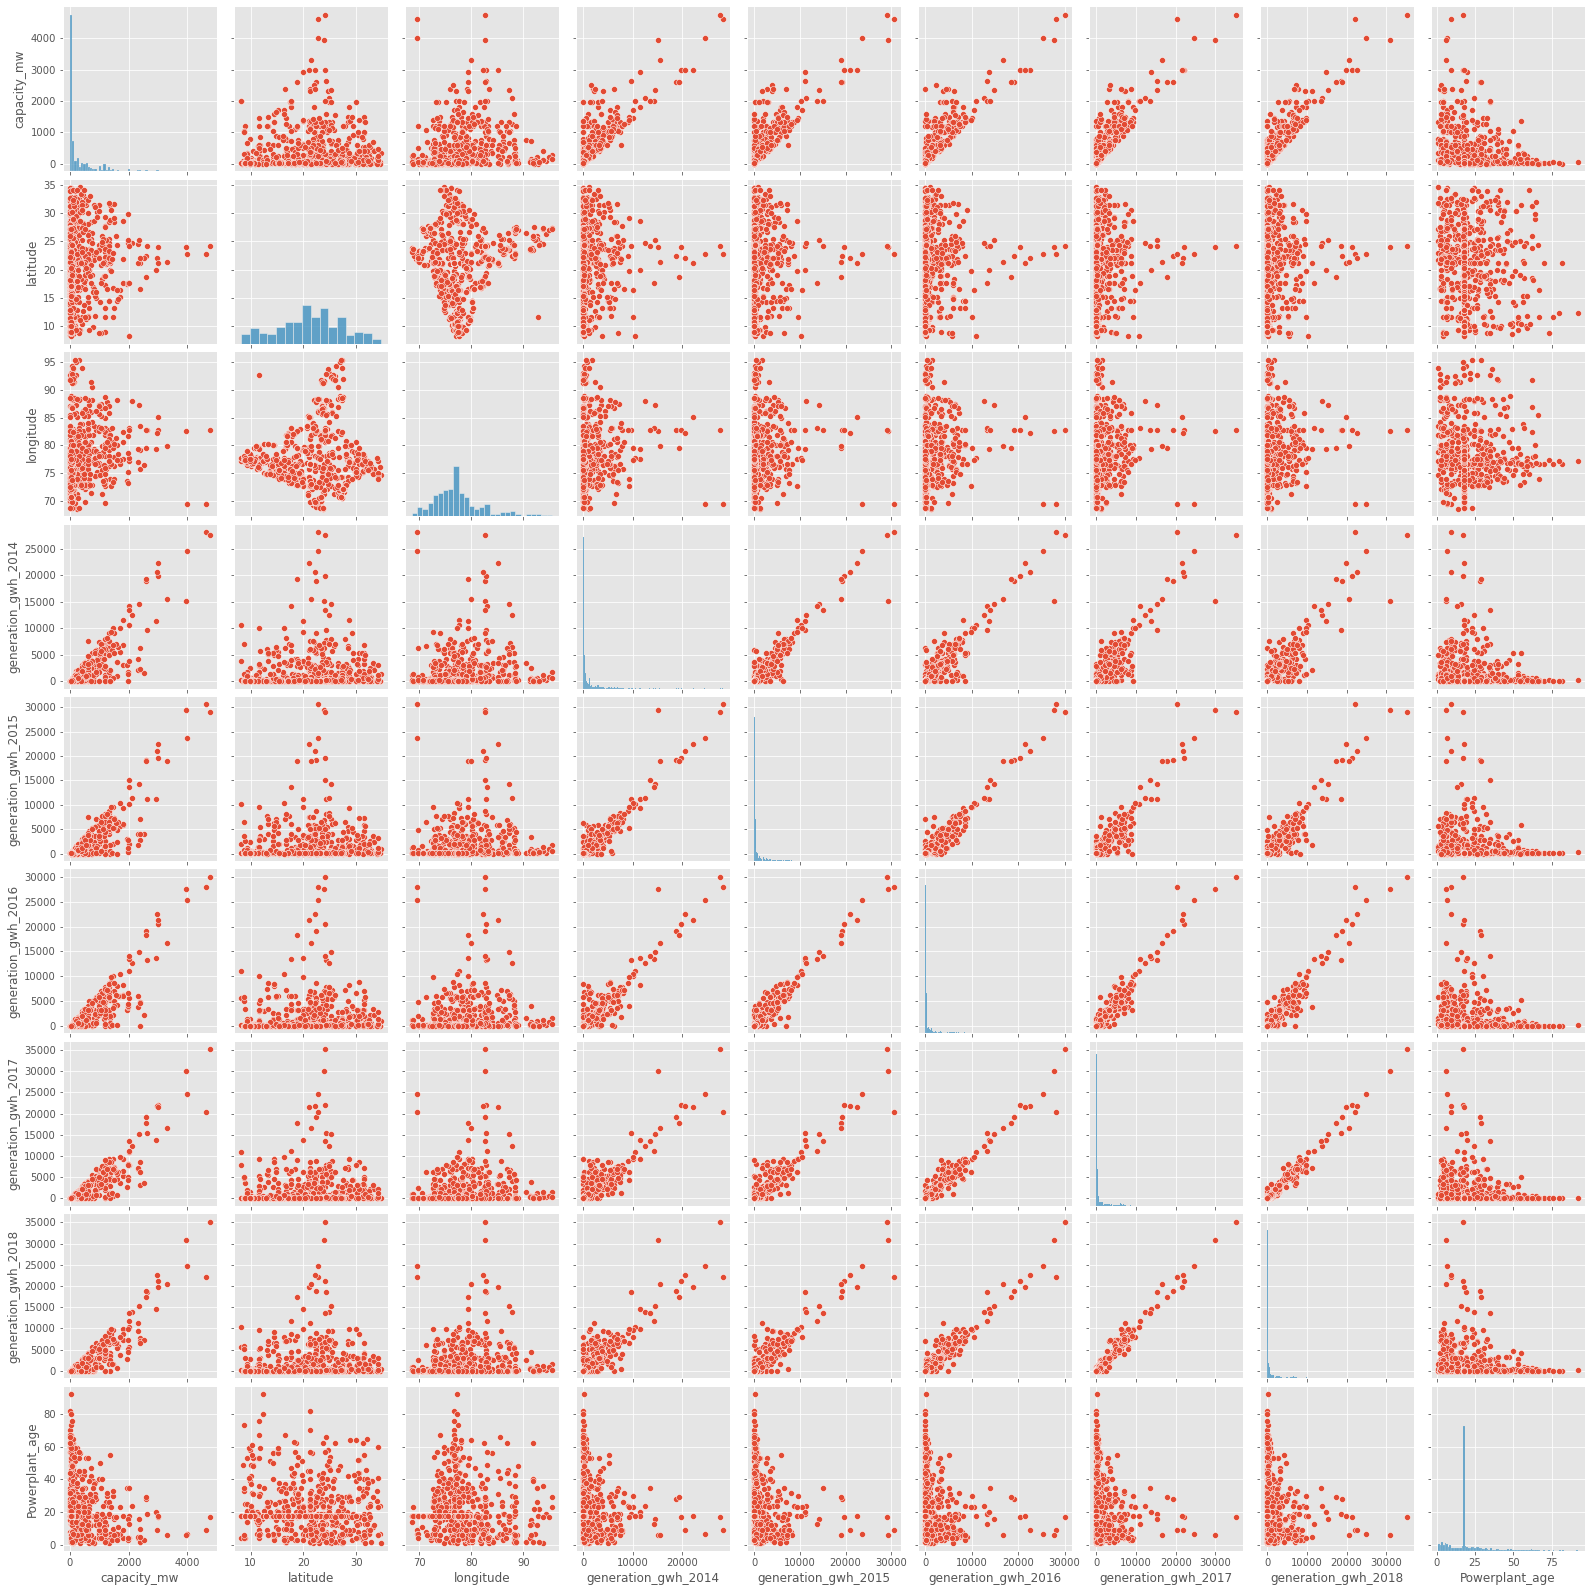

In [49]:
# Checking the pairwise relation between the features.
sns.pairplot(data)

## from above pairplot , we conclude that there are linear relationship between few variable, let us check multicollinearity to avoid later problem

## checking for outliers:

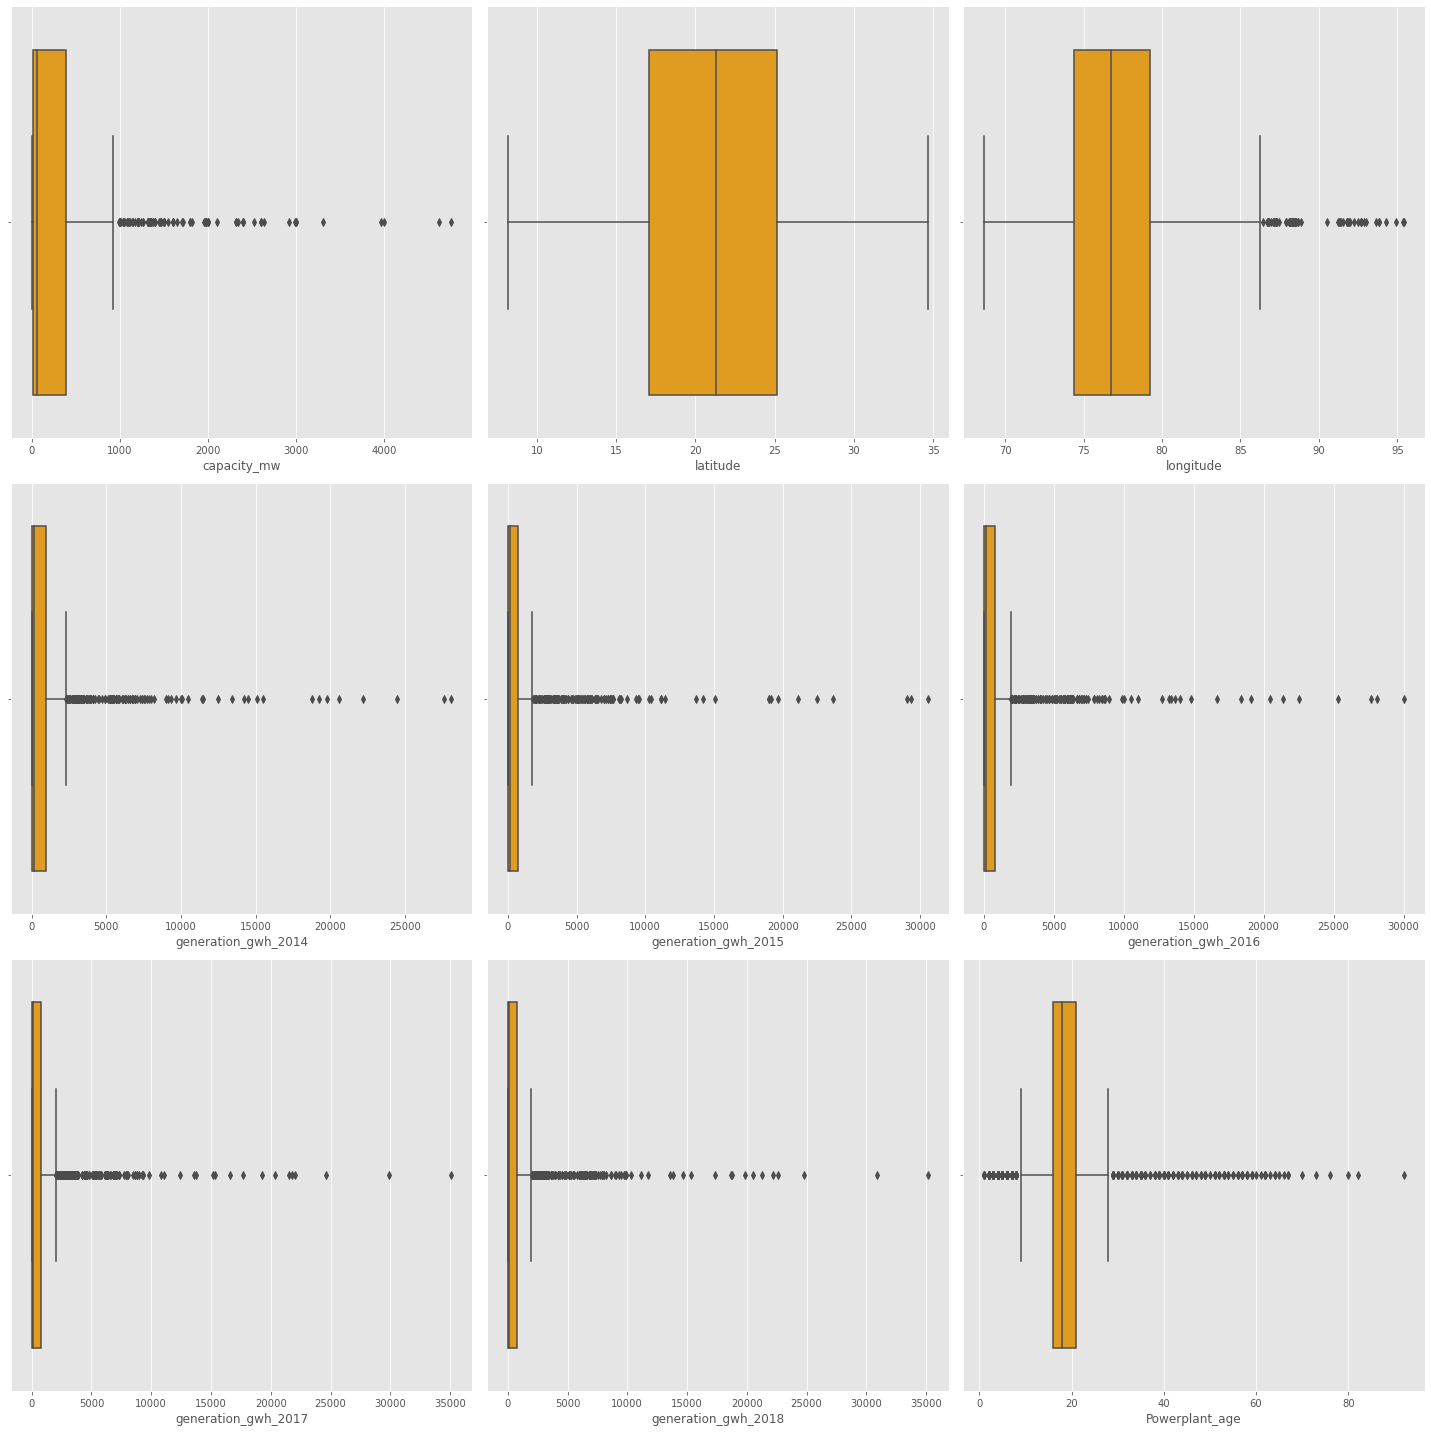

In [50]:
#Identifying the outliers
# Identifying the outlierspresent in numerical columns using boxplot

plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column],color="orange")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

## all features contained outliers except latitude column.

# Removing outliers using Zscore method

In [51]:
# Features containing outliers
features = data[['longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Powerplant_age']]
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,0.869917,0.407783,0.388685,0.394962,0.399239,0.395075,0.933076
1,0.585590,0.303199,0.338753,0.317101,0.340211,0.318779,0.172699
2,1.673567,0.384536,0.356870,0.361220,0.347875,0.349436,0.172699
3,2.895239,0.203542,0.122313,0.115372,0.197893,0.219380,0.400812
4,1.035238,0.618085,1.504758,1.592397,1.284064,1.801917,1.237227
...,...,...,...,...,...,...,...
902,0.014609,0.841002,0.392630,0.323355,0.134612,0.201071,1.313265
903,0.153415,0.407783,0.388685,0.394962,0.399239,0.395075,0.172699
904,0.383592,0.407783,0.388685,0.394962,0.399239,0.395075,0.172699
905,0.764564,0.340967,0.332867,0.328925,0.329901,0.331681,0.172699


In [52]:
# Creating new dataframe
new_df = data[(z<3).all(axis=1)] 
new_df

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,16.779017,13.293200,8.974900,22.244883,47.968950,8.0
1,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,324.532517,168.964267,253.214233,210.319783,299.083733,18.0
2,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,85.185267,112.481433,114.819683,185.902483,198.180783,18.0
3,IND0000001,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,3691.517167,0.994875,233.596650,865.400000,686.500000,3.0
903,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,16.779017,13.293200,8.974900,22.244883,47.968950,18.0
904,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,16.779017,13.293200,8.974900,22.244883,47.968950,18.0
905,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,213.394333,187.315383,216.123950,243.171367,256.620450,18.0


In [53]:
#check % of data loss
data.shape

(907, 14)

In [54]:
(907-852)/907*100

6.063947078280044

## using zscore , we are losing only 6% of data , that is affordable and we may proceed with this

# checking outlier using IQR Method

In [55]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

new_df1=data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
new_df1

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
1,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,324.532517,168.964267,253.214233,210.319783,299.083733,18.0
2,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,85.185267,112.481433,114.819683,185.902483,198.180783,18.0
5,IND0000003,250.0,23.7689,68.6447,Coal,Oil,Central Electricity Authority,WRI,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,14.0
7,IND0000005,192.0,32.2258,77.2070,Hydro,Oil,Central Electricity Authority,WRI,674.391100,721.335200,675.724400,679.594950,579.318850,9.0
8,IND0000006,290.0,16.3300,75.8863,Hydro,Oil,Central Electricity Authority,WRI,480.594950,144.434200,402.029750,439.372100,406.377900,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,IND0000512,106.6,13.1156,77.5838,Oil,Oil,Central Electricity Authority,WRI,0.000000,0.000000,0.000000,356.782283,0.000000,26.0
903,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,16.779017,13.293200,8.974900,22.244883,47.968950,18.0
904,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,16.779017,13.293200,8.974900,22.244883,47.968950,18.0
905,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,213.394333,187.315383,216.123950,243.171367,256.620450,18.0


In [56]:
#check the loss of data
(907-508)/907*100

43.991179713340685

43% of data loss is not acceptaple, let us use zscore method so we will proceed with new_df

# Encoding the categorical columns using Label Encoding:

In [57]:
categorical_col = ['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)
new_df[categorical_col]

,primary_fuel,other_fuel1,source,geolocation_source
0,6,2,108,1
1,1,2,173,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,76,0
904,7,2,21,2
905,1,2,59,2


## skewness

In [58]:
# Checking the skewness
new_df.skew()

capacity_mw             2.178028
latitude               -0.114376
longitude               0.944500
primary_fuel            0.418465
other_fuel1           -19.820871
source                  1.744999
geolocation_source     -2.068499
generation_gwh_2014     2.562088
generation_gwh_2015     2.519395
generation_gwh_2016     2.504234
generation_gwh_2017     2.430029
generation_gwh_2018     2.502936
Powerplant_age          1.278164
dtype: float64

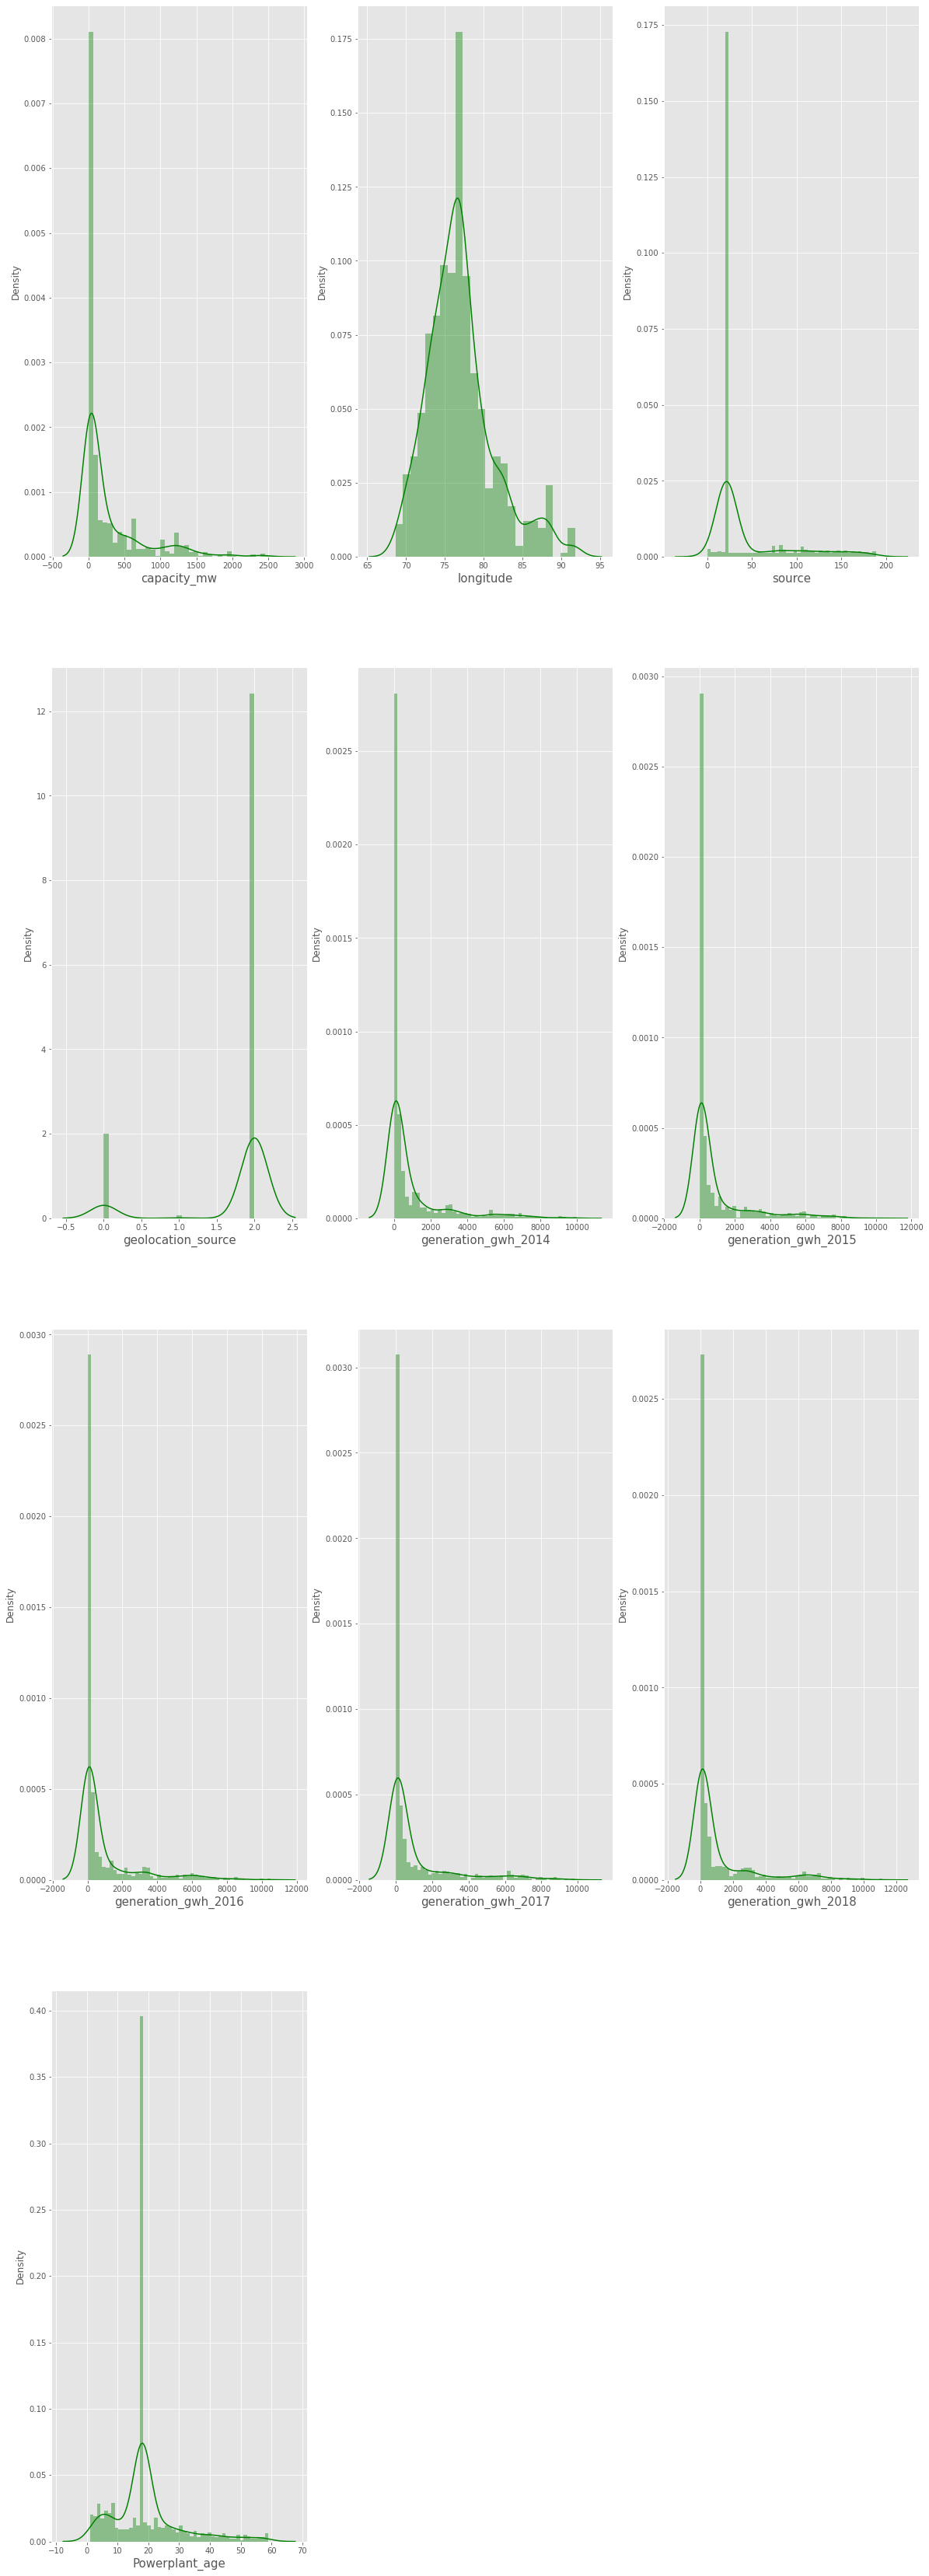

In [59]:
#let plot skewness using distplot


feat=new_df[["capacity_mw",'longitude','source','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Powerplant_age']]
#Relationship Visualizing

plt.figure(figsize = (20,60))
plotnumber = 1

for column in feat:
    if plotnumber <= 10:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(feat[column], color = 'g')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

## High skewness is present in many fields as we seen in skew() function.

In [60]:
sk_features=["capacity_mw",'longitude','other_fuel1','source','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Powerplant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
new_df[sk_features] = scaler.fit_transform(new_df[sk_features].values)
new_df[sk_features].head()

,capacity_mw,longitude,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-1.677481,-0.923030,0.059444,1.528956,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,0.217991,-0.500876,0.059444,1.988904,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-0.276045,-2.378126,0.059444,-0.486073,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,0.389150,2.432203,0.059444,-0.419323,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.727387,1.261806,0.059444,-0.419323,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572


## Skewness has been reduced using powertranformer and let us plot the same

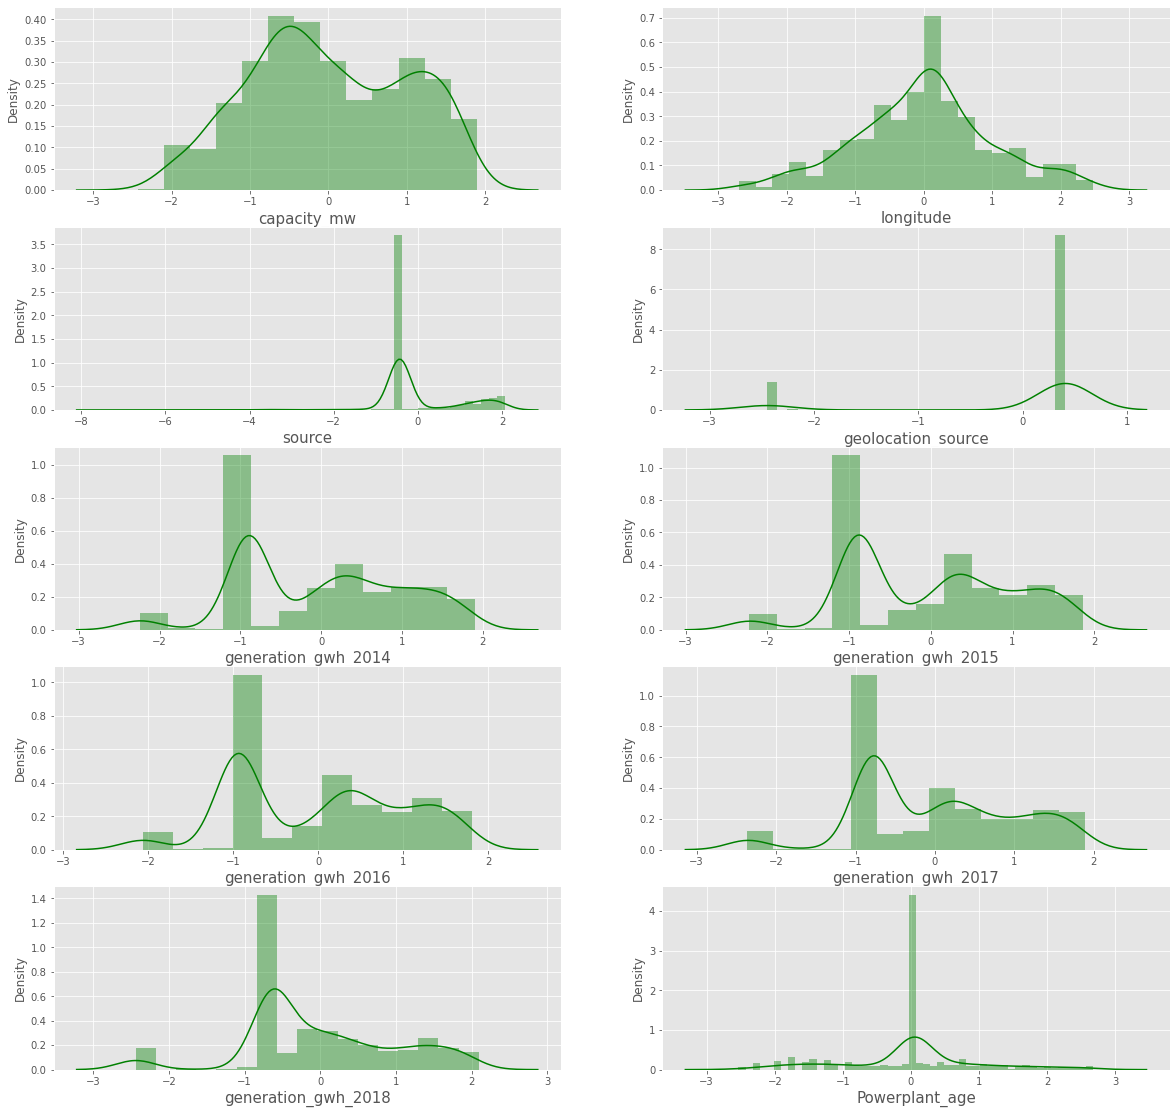

In [61]:
plt.figure(figsize = (20,60))
plotnumber = 1

for column in feat:
    if plotnumber <= 10:
        ax = plt.subplot(15,2,plotnumber)
        sns.distplot(new_df[column], color = 'g')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

## Correlation between the target variable and features using HEAT map

In [62]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
capacity_mw,1.000000,0.057972,0.342446,-0.529581,-0.044733,-0.334412,0.474987,0.757459,0.760339,0.792913,0.725192,0.658112,-0.251353
latitude,0.057972,1.000000,-0.069975,-0.000886,0.033249,0.060840,-0.207337,0.127853,0.121847,0.152363,0.140021,0.151176,-0.108286
longitude,0.342446,-0.069975,1.000000,-0.413280,0.039861,-0.198453,0.303271,0.267497,0.247803,0.297372,0.273371,0.260847,-0.141463
primary_fuel,-0.529581,-0.000886,-0.413280,1.000000,-0.010352,0.006314,-0.481369,-0.376449,-0.371171,-0.398699,-0.356194,-0.336625,0.147928
other_fuel1,-0.044733,0.033249,0.039861,-0.010352,1.000000,0.024926,-0.024299,0.004380,0.035902,0.058949,0.022587,0.077934,-0.071462
source,-0.334412,0.060840,-0.198453,0.006314,0.024926,1.000000,-0.396947,-0.244797,-0.244136,-0.252735,-0.224322,-0.190145,-0.007056
geolocation_source,0.474987,-0.207337,0.303271,-0.481369,-0.024299,-0.396947,1.000000,0.301693,0.300898,0.313515,0.266767,0.223006,-0.002631
generation_gwh_2014,0.757459,0.127853,0.267497,-0.376449,0.004380,-0.244797,0.301693,1.000000,0.848410,0.848035,0.776621,0.755111,-0.102748
generation_gwh_2015,0.760339,0.121847,0.247803,-0.371171,0.035902,-0.244136,0.300898,0.848410,1.000000,0.904655,0.793076,0.774797,-0.125518
generation_gwh_2016,0.792913,0.152363,0.297372,-0.398699,0.058949,-0.252735,0.313515,0.848035,0.904655,1.000000,0.884353,0.862621,-0.181588


## This gives the correlation between the dependent and independent variables. We can visualize this by plotting throuh heat map.

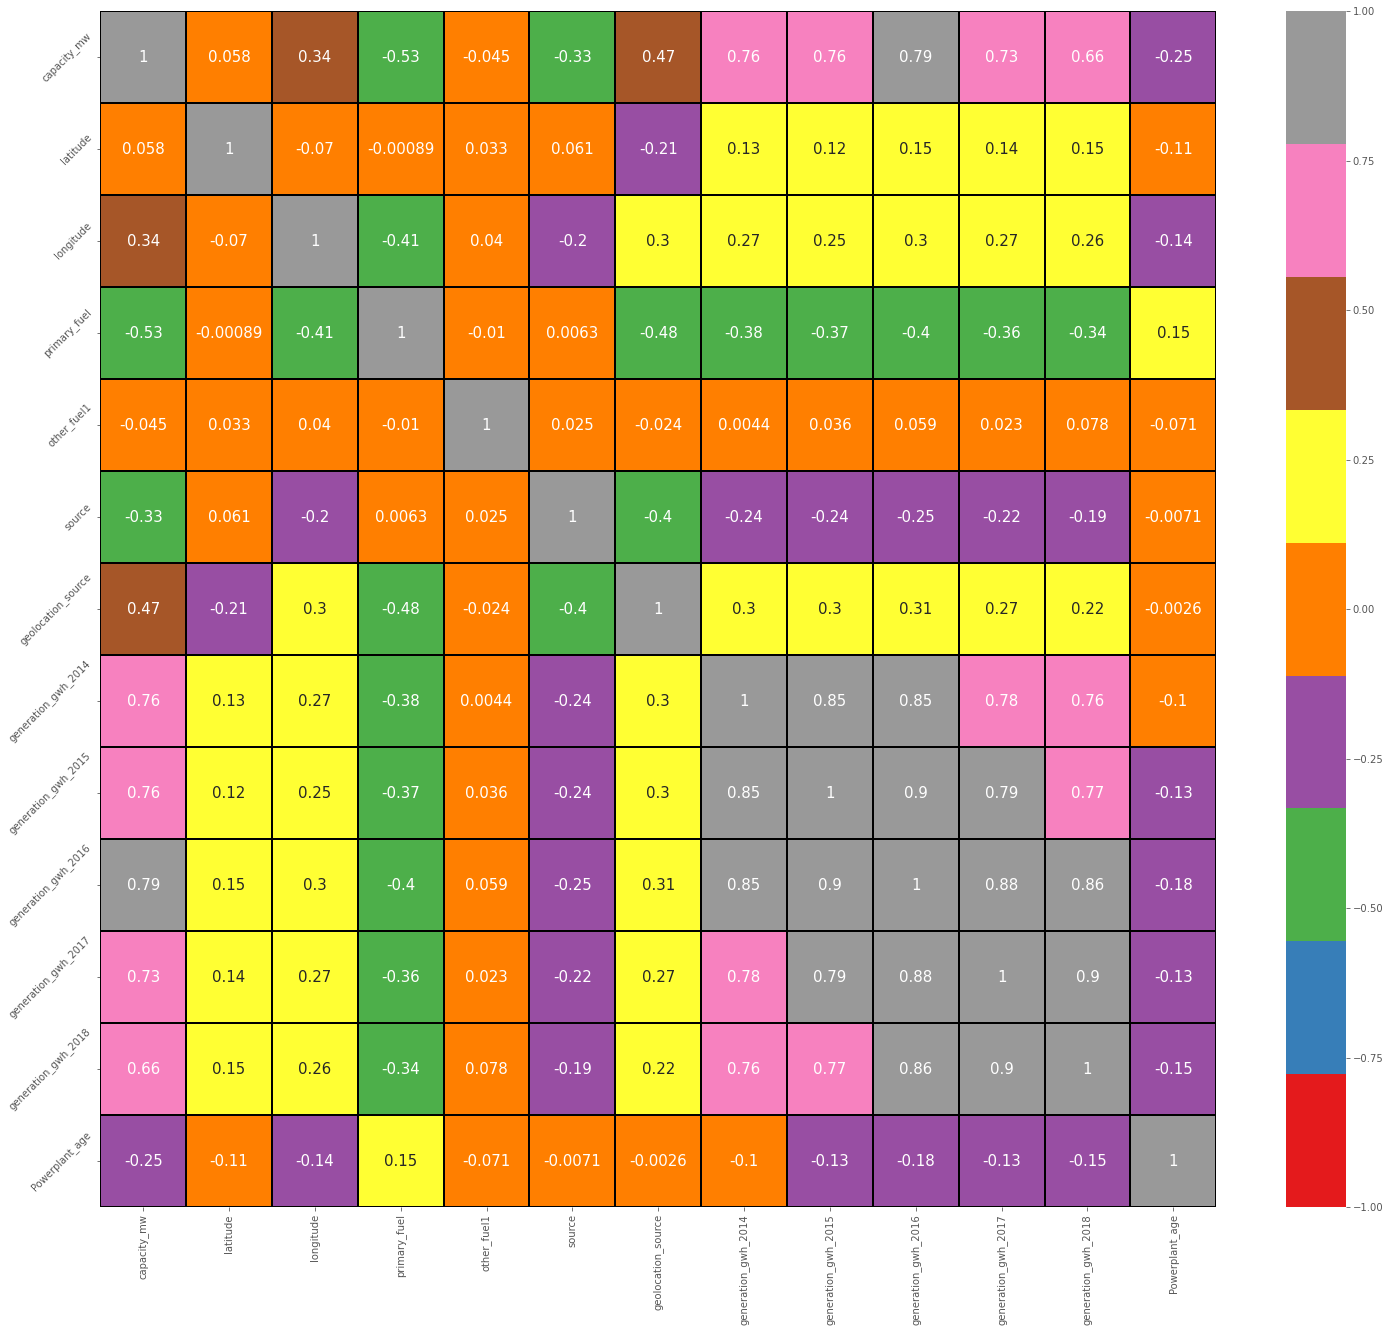

In [63]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="Set1")
plt.yticks(rotation=45);

## 1.The label capacity_mw is highly positively correlated with the features generation_gwh_2017, generation_gwh_2016,
## 2.generation_gwh_2015, generation_gwh_2014, generation_gwh_2018. And the label is negatively correlated with the features Fuel_Type, source and Power_plant_age.
## 3The columns other_fuel1 and latitude have no relation with the label, so we can drop them.

In [64]:
#Let us save one Data Frame for regression problem
Classif_data=new_df

## Visualizing the correlation between capacity_mw and features using bar plot

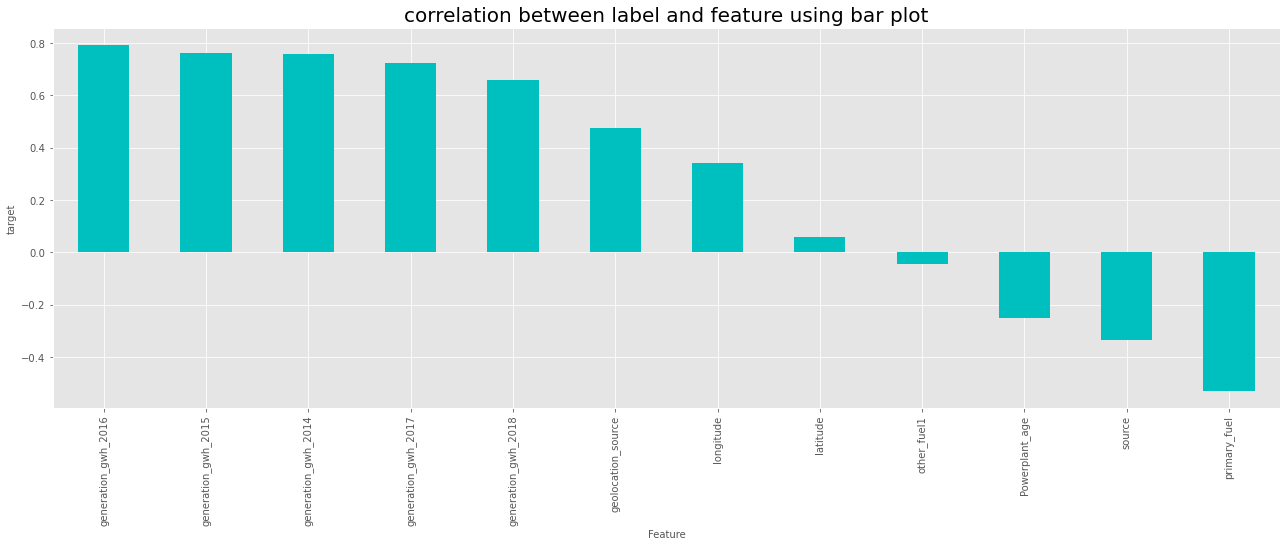

In [65]:
plt.figure(figsize=(22,7))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

## There is not that much relation between label and other_fuel1,latitude so let us drop that also

In [66]:
new_df.drop('other_fuel1',axis=1,inplace=True)
new_df.drop('latitude',axis=1,inplace=True)
new_df.drop('gppd_idnr',axis=1,inplace=True)

## seperating Label and Features:

In [68]:
x=new_df.drop('capacity_mw',axis=1)
y=new_df['capacity_mw']
x.head()

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-0.923030,6,1.528956,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,-0.500876,1,1.988904,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-2.378126,7,-0.486073,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,2.432203,2,-0.419323,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.261806,1,-0.419323,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572


In [69]:
x.shape

(852, 10)

In [70]:
y.shape

(852,)

# Standard Scalarization for Feature Scaling:

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-0.923030,1.177615,1.528956,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,-0.500876,-0.972680,1.988904,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-2.378126,1.607673,-0.486073,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,2.432203,-0.542621,-0.419323,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.261806,-0.972680,-0.419323,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572
...,...,...,...,...,...,...,...,...,...,...
847,0.231036,-0.972680,-0.419323,0.408766,1.476737,-1.863092,0.413698,0.864578,0.657367,-1.980203
848,0.420781,1.177615,1.153075,-2.452783,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.049506
849,-0.225422,1.607673,-0.486073,0.408766,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.049506
850,-0.761662,-0.972680,0.863803,0.408766,0.232440,0.276415,0.382819,0.305697,0.168257,0.049506


## we have scaled the data using standard scalarizaion method to overcome with the issue of data biasness. As we have observed in the heat map there is multicollinearity issue exists in the data, So let's check the VIF value and if the columns have VIF greater than 10 then we can drop those columns.

# Checking VIF(Variance Inflation Factor) values:

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.297178,longitude
1,1.739390,primary_fuel
2,1.361687,source
3,1.662795,geolocation_source
4,4.224308,generation_gwh_2014
5,6.426827,generation_gwh_2015
6,10.785110,generation_gwh_2016
7,7.294450,generation_gwh_2017
8,6.220114,generation_gwh_2018
9,1.078297,Powerplant_age


## we can observe that all the columns have VIF less than 10 except generation_gwh_2016 but slightly above that which we can ignore which means we are free from multicollinearity problem. Let's proceed to buliding machine learning models.

# MODEL BUILDING:

## searching for best random state

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9333517774668892  on Random_state  129


## We are getting the maximum R2 score as 93.21% on the random state 129.

# Creating new train test split:

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# importing Regression Algorithms:

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Random Forest Regressor:

In [76]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('MAE:',mean_absolute_error(y_test, predRFR))
print('MSE:',mean_squared_error(y_test, predRFR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predRFR)))
# Checking cv score 
print(cross_val_score(RFR,x,y,cv=5).mean())

R2_Score: 0.9324468624332378
MAE: 0.1954153793662407
MSE: 0.07691907182571382
RMSE: 0.27734287772667576
0.8918748224668178


# Decision Tree Regressor:

In [77]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('MAE:',mean_absolute_error(y_test, predDTR))
print('MSE:',mean_squared_error(y_test, predDTR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predDTR)))
# Checking cv score 
print(cross_val_score(DTR,x,y,cv=5).mean())

R2_Score: 0.8699558921750756
MAE: 0.2618530368135614
MSE: 0.1480741299456368
RMSE: 0.3848040149811808
0.7964352463884683


# Stochastic KNN Regressor:

In [78]:
# Checking R2 score for Stochastic KNN Regressor
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',mean_absolute_error(y_test, predknn))
print('MSE:',mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predknn)))
# Checking cv score 
print(cross_val_score(knn,x,y,cv=5).mean())

R2_Score: 0.9006511015364789
MAE: 0.25059709359517646
MSE: 0.11312316987747278
RMSE: 0.33633788052711633
0.8617769617800095


# GradientBoosting Regressor:

In [79]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',mean_absolute_error(y_test, predGB))
print('MSE:',mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predGB)))
# Checking cv score 

print(cross_val_score(GB,x,y,cv=5).mean())

R2_Score: 0.9275014058099262
MAE: 0.21605183451459858
MSE: 0.08255019344228573
RMSE: 0.28731549460877626
0.9007263337410161


# BaggingRegressor:

In [80]:
# Checking R2 score for BaggingRegressor
from sklearn.ensemble import BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR))
print('MAE:',mean_absolute_error(y_test, predBR))
print('MSE:',mean_squared_error(y_test, predBR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predBR)))
# Checking cv score
cr=cross_val_score(BR,x,y,cv=5).mean()
print(cross_val_score(BR,x,y,cv=5).mean())

R2_Score: 0.9190450130649674
MAE: 0.21460671811530854
MSE: 0.09217902645234521
RMSE: 0.30360999069916195
0.883313010756806


## From above observation, we come to conclusion that the difference between R2 score and the cross validation score we conclude that GradientBoosting Regressor as our best fitting model. Let's increse the accuracy of the model by using hyper parameter tuning.

# HYPERPARAMETR TUNING:

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
parameters={'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
           'max_features' : ['auto', 'sqrt', 'log2'],
           'learning_rate':[0.1,.2,.4,.5],
           'criterion' : ['friedman_mse', 'squared_error', 'mse'], 
          
          }
GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)

In [83]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.1, 0.2, 0.4, 0.5],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [84]:
GCV.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'loss': 'huber',
 'max_features': 'sqrt'}

In [85]:
capacity_model = GradientBoostingRegressor(criterion='squared_error', learning_rate= 0.1, loss= 'squared_error',max_features= 'sqrt')
capacity_model.fit(x_train, y_train)
pred = capacity_model.predict(x_test)
print("RMSE value:",np.sqrt(mean_squared_error(y_test, predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.27734287772667576
R2_Score: 92.81056724460099


## Our model achived 92.64% of accuracy, So let us save the model

# Saving the model:

In [86]:
# Saving the model using .pkl
import joblib
joblib.dump(capacity_model,"Global_Power_Plant_capacity_mw.pkl")

['Global_Power_Plant_capacity_mw.pkl']

# loading the model:

In [88]:
# Loading the saved model
model=joblib.load("Global_Power_Plant_capacity_mw.pkl")

#Prediction
prediction = model.predict(x_test)
a = np.array(y_test)
df_final = pd.DataFrame({"Original":a,"Predicted":prediction},index=range(len(a)))
df_final

,Original,Predicted
0,-0.396120,-0.298656
1,-0.458110,-0.405942
2,-0.948842,-1.025621
3,0.165116,0.367780
4,1.523747,1.241725
...,...,...
251,0.860692,0.983294
252,1.698815,1.310514
253,1.377918,0.942754
254,1.593827,1.421751


# plotting the prediction:

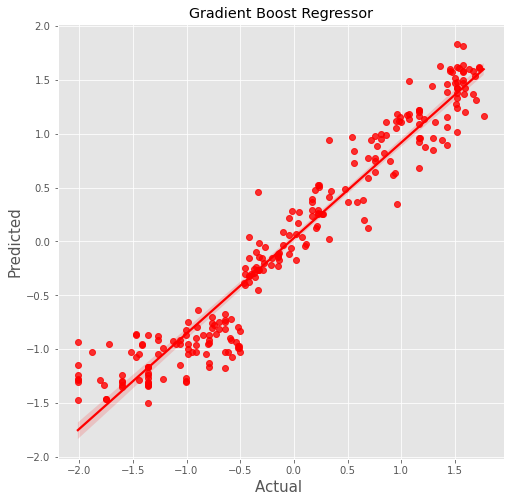

In [89]:
plt.figure(figsize=(8,8))
sns.regplot(y_test,prediction,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title("Gradient Boost Regressor")
plt.show()

# MODEL 2 capacity_mw is target variable . Let us Do the Classification

## we have already saved our data set after removing skewness

In [90]:
Classif_data.head()

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-1.677481,-0.923030,6,1.528956,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,0.217991,-0.500876,1,1.988904,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-0.276045,-2.378126,7,-0.486073,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,0.389150,2.432203,2,-0.419323,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.727387,1.261806,1,-0.419323,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572


## We will remove gppd_idnr as for each row it is diiferent and doesnot contribute much.

In [91]:
#let us rename 'primary_fuel' to Fuel_Type
Classif_data.rename(columns={'primary_fuel':'Fuel_Type'},inplace=True)

In [92]:
#now let us plot correlation and heatmap so that we can move forward
Classif_data.corr()

,capacity_mw,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
capacity_mw,1.000000,0.342446,-0.529581,-0.334412,0.474987,0.757459,0.760339,0.792913,0.725192,0.658112,-0.251353
longitude,0.342446,1.000000,-0.413280,-0.198453,0.303271,0.267497,0.247803,0.297372,0.273371,0.260847,-0.141463
Fuel_Type,-0.529581,-0.413280,1.000000,0.006314,-0.481369,-0.376449,-0.371171,-0.398699,-0.356194,-0.336625,0.147928
source,-0.334412,-0.198453,0.006314,1.000000,-0.396947,-0.244797,-0.244136,-0.252735,-0.224322,-0.190145,-0.007056
geolocation_source,0.474987,0.303271,-0.481369,-0.396947,1.000000,0.301693,0.300898,0.313515,0.266767,0.223006,-0.002631
generation_gwh_2014,0.757459,0.267497,-0.376449,-0.244797,0.301693,1.000000,0.848410,0.848035,0.776621,0.755111,-0.102748
generation_gwh_2015,0.760339,0.247803,-0.371171,-0.244136,0.300898,0.848410,1.000000,0.904655,0.793076,0.774797,-0.125518
generation_gwh_2016,0.792913,0.297372,-0.398699,-0.252735,0.313515,0.848035,0.904655,1.000000,0.884353,0.862621,-0.181588
generation_gwh_2017,0.725192,0.273371,-0.356194,-0.224322,0.266767,0.776621,0.793076,0.884353,1.000000,0.904954,-0.131981
generation_gwh_2018,0.658112,0.260847,-0.336625,-0.190145,0.223006,0.755111,0.774797,0.862621,0.904954,1.000000,-0.147871


## we found earlier data contains both positevily and negatevily co-related data

<AxesSubplot:>

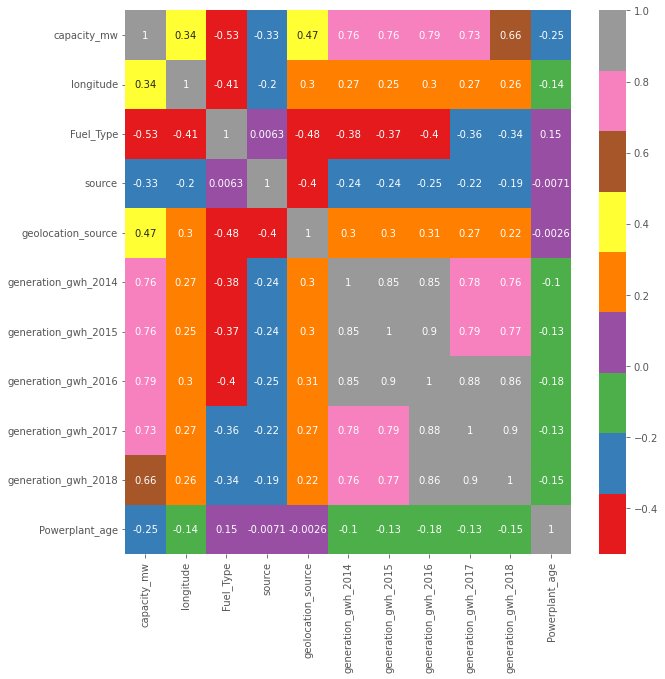

In [93]:
plt.figure(figsize=(10,10))
sns.heatmap(Classif_data.corr(), annot = True, linecolor="c",cmap="Set1")

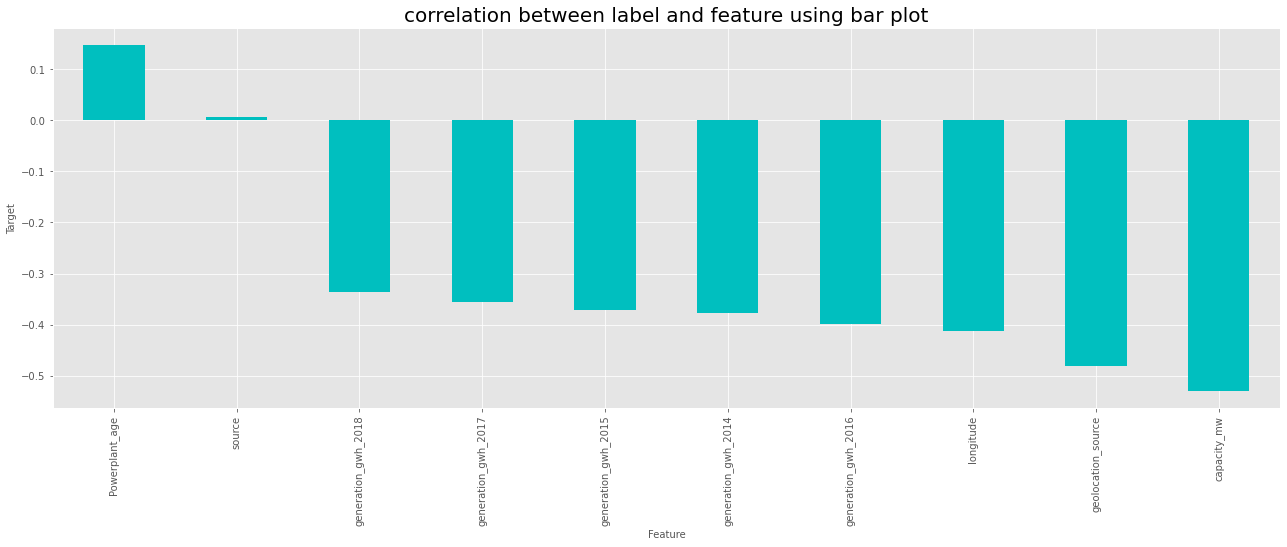

In [94]:
plt.figure(figsize=(22,7))
Classif_data.corr()['Fuel_Type'].sort_values(ascending=False).drop(['Fuel_Type']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('Target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

In [95]:
Classif_data.drop(columns=['source','longitude'],axis=1,inplace=True)
Classif_data.head()

,capacity_mw,Fuel_Type,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-1.677481,6,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,0.217991,1,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-0.276045,7,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,0.389150,2,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.727387,1,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572


# Seperating Label and Features:

In [96]:
cl_x=Classif_data.drop("Fuel_Type",axis=1)#features
cl_y=Classif_data['Fuel_Type']#Label

In [97]:
cl_x.shape

(852, 8)

In [98]:
cl_y.shape

(852,)

# Standard Scalarization for feature scaling:

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cl_x= pd.DataFrame(scaler.fit_transform(cl_x), columns=cl_x.columns)
cl_x

,capacity_mw,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-1.677481,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,0.217991,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-0.276045,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,0.389150,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.727387,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572
...,...,...,...,...,...,...,...,...
847,1.668461,0.408766,1.476737,-1.863092,0.413698,0.864578,0.657367,-1.980203
848,-1.598358,-2.452783,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.049506
849,-0.508660,0.408766,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.049506
850,0.109050,0.408766,0.232440,0.276415,0.382819,0.305697,0.168257,0.049506


# VIF values:

In [100]:
#Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(cl_x.values,i)
              for i in range(len(cl_x.columns))]
vif["Features"] = cl_x.columns

# Let's check the values
vif

,VIF values,Features
0,3.814449,capacity_mw
1,1.350136,geolocation_source
2,4.444195,generation_gwh_2014
3,6.465385,generation_gwh_2015
4,11.077630,generation_gwh_2016
5,7.530329,generation_gwh_2017
6,6.381029,generation_gwh_2018
7,1.139573,Powerplant_age


## As the VIF scores are less then 10 except generation_gwh_2016 we can proceed further

In [101]:
# let us check whether our label is equaly ditributed
cl_y.value_counts()

1    240
3    220
6    126
7    123
2     65
0     50
5     20
4      8
Name: Fuel_Type, dtype: int64

## Our Label is not equally distributed so we need to use sampling technique( SMOTE) to make it normal

# SMOTE:

In [102]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
cl_x, cl_y = SM.fit_resample(cl_x,cl_y)
cl_y.value_counts()

6    240
1    240
7    240
2    240
3    240
0    240
5    240
4    240
Name: Fuel_Type, dtype: int64

## Model BUILDING:

## Best random state:

In [103]:
#Finding best random state
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    clx_train,clx_test,cly_train,cly_test = train_test_split(cl_x,cl_y,test_size=.25, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(clx_train, cly_train)
    pred = DTC.predict(clx_test)
    acc=accuracy_score(cly_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8104166666666667  on Random_state  97


# Creating train_test split:

In [104]:
clx_train,clx_test,cly_train,cly_test = train_test_split(cl_x,cl_y,test_size=.30, random_state =maxRS)

# Importing Classification Alogorithms:

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

# Decision Tree Classifier:

In [106]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(clx_train,cly_train)

#Prediction
pred = DTC.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred))
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,cl_x,cl_y,cv=5).mean())

0.7934027777777778
[[53  2  0  0  0  3  0  8]
 [ 4 24 12  7  5  2  1  1]
 [ 1  9 57  7  0  3  0  3]
 [ 2  5  5 46  2  0  0  1]
 [ 0  1  0  2 63  0  0  0]
 [ 3  0  2  2  0 77  0  2]
 [ 0  1  0  0  0  0 84  0]
 [12  7  2  0  0  2  0 53]]
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        66
           1       0.49      0.43      0.46        56
           2       0.73      0.71      0.72        80
           3       0.72      0.75      0.74        61
           4       0.90      0.95      0.93        66
           5       0.89      0.90      0.89        86
           6       0.99      0.99      0.99        85
           7       0.78      0.70      0.74        76

    accuracy                           0.79       576
   macro avg       0.77      0.78      0.78       576
weighted avg       0.79      0.79      0.79       576

0.7703125


# RandomForestClassifier

In [107]:
RFC = RandomForestClassifier()
RFC.fit(clx_train,cly_train)

#Prediction
pred = RFC.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(RFC,cl_x,cl_y,cv=5).mean()*100)

83.15972222222221
[[53  3  0  0  0  3  0  7]
 [ 5 26  9  4  5  5  0  2]
 [ 1  4 67  2  3  3  0  0]
 [ 1  4  2 53  0  0  0  1]
 [ 0  0  0  2 64  0  0  0]
 [ 2  0  0  3  0 78  0  3]
 [ 0  0  0  1  0  0 84  0]
 [12  5  2  0  0  3  0 54]]
              precision    recall  f1-score   support

           0       0.72      0.80      0.76        66
           1       0.62      0.46      0.53        56
           2       0.84      0.84      0.84        80
           3       0.82      0.87      0.84        61
           4       0.89      0.97      0.93        66
           5       0.85      0.91      0.88        86
           6       1.00      0.99      0.99        85
           7       0.81      0.71      0.76        76

    accuracy                           0.83       576
   macro avg       0.82      0.82      0.81       576
weighted avg       0.83      0.83      0.83       576

Corross Validation Score 81.09375


# SVM

In [108]:
SVM = SVC()
SVM.fit(clx_train,cly_train)

#Prediction
pred = SVM.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(SVM,cl_x,cl_y,cv=5).mean()*100)

67.01388888888889
[[62  0  0  0  0  0  0  4]
 [ 8 20  8  1  9  1  0  9]
 [ 3  4 56  0  7  4  0  6]
 [ 7  5 14 29  1  0  0  5]
 [ 0  8  0  2 56  0  0  0]
 [26  0  0  0  0 48  0 12]
 [ 0  0  1  0  0  0 84  0]
 [39  0  6  0  0  0  0 31]]
              precision    recall  f1-score   support

           0       0.43      0.94      0.59        66
           1       0.54      0.36      0.43        56
           2       0.66      0.70      0.68        80
           3       0.91      0.48      0.62        61
           4       0.77      0.85      0.81        66
           5       0.91      0.56      0.69        86
           6       1.00      0.99      0.99        85
           7       0.46      0.41      0.43        76

    accuracy                           0.67       576
   macro avg       0.71      0.66      0.66       576
weighted avg       0.72      0.67      0.67       576

Corross Validation Score 67.5


# KNN

In [109]:
knn = KNN()
knn.fit(clx_train,cly_train)

#Prediction
pred = knn.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(knn,cl_x,cl_y,cv=5).mean()*100)

76.73611111111111
[[55  0  0  0  0  1  0 10]
 [ 6 22  9  2  5  5  1  6]
 [ 2  6 59  1  4  6  0  2]
 [ 1  3 11 40  1  1  0  4]
 [ 0  0  3  1 62  0  0  0]
 [ 8  0  4  1  0 72  0  1]
 [ 0  1  0  0  0  0 84  0]
 [14  5  4  0  0  5  0 48]]
              precision    recall  f1-score   support

           0       0.64      0.83      0.72        66
           1       0.59      0.39      0.47        56
           2       0.66      0.74      0.69        80
           3       0.89      0.66      0.75        61
           4       0.86      0.94      0.90        66
           5       0.80      0.84      0.82        86
           6       0.99      0.99      0.99        85
           7       0.68      0.63      0.65        76

    accuracy                           0.77       576
   macro avg       0.76      0.75      0.75       576
weighted avg       0.77      0.77      0.76       576

Corross Validation Score 76.92708333333333


# BaggingClassifier

In [110]:
BC= BaggingClassifier()
BC.fit(clx_train,cly_train)

#Prediction
pred = BC.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(BC,cl_x,cl_y,cv=5).mean()*100)

80.72916666666666
[[49  3  0  0  0  3  0 11]
 [ 4 28  9  2  6  4  1  2]
 [ 0  8 62  5  1  3  0  1]
 [ 1  5  5 47  2  0  0  1]
 [ 0  0  0  0 66  0  0  0]
 [ 1  0  2  3  0 77  0  3]
 [ 0  0  1  0  0  0 84  0]
 [13  4  3  0  0  4  0 52]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73        66
           1       0.58      0.50      0.54        56
           2       0.76      0.78      0.77        80
           3       0.82      0.77      0.80        61
           4       0.88      1.00      0.94        66
           5       0.85      0.90      0.87        86
           6       0.99      0.99      0.99        85
           7       0.74      0.68      0.71        76

    accuracy                           0.81       576
   macro avg       0.79      0.79      0.79       576
weighted avg       0.80      0.81      0.80       576

Corross Validation Score 80.0


# GradientBoostingClassifier

In [111]:
GBC = GradientBoostingClassifier()
GBC.fit(clx_train,cly_train)

#Prediction
pred = GBC.predict(clx_test)
#Accuracy
print(accuracy_score(cly_test, pred)*100)
print(confusion_matrix(cly_test, pred))
print(classification_report(cly_test,pred))
#Cross Validation
# cv score for Decision Tree Classifier
print("Corross Validation Score",cross_val_score(GBC,cl_x,cl_y,cv=5).mean()*100)

80.55555555555556
[[52  2  0  0  0  3  0  9]
 [ 7 27  5  6  2  7  0  2]
 [ 0  6 60  5  1  5  0  3]
 [ 1  5  6 49  0  0  0  0]
 [ 0  0  0  1 65  0  0  0]
 [ 4  0  0  1  0 78  0  3]
 [ 0  0  0  1  0  0 84  0]
 [16  5  3  0  0  3  0 49]]
              precision    recall  f1-score   support

           0       0.65      0.79      0.71        66
           1       0.60      0.48      0.53        56
           2       0.81      0.75      0.78        80
           3       0.78      0.80      0.79        61
           4       0.96      0.98      0.97        66
           5       0.81      0.91      0.86        86
           6       1.00      0.99      0.99        85
           7       0.74      0.64      0.69        76

    accuracy                           0.81       576
   macro avg       0.79      0.79      0.79       576
weighted avg       0.80      0.81      0.80       576

Corross Validation Score 80.88541666666667


# Hyper Parameter Tuning:

In [118]:
parameters={'loss' : ['log_loss', 'deviance', 'exponential'],
           'n_estimators':[1,20,50,100],
           'learning_rate':[0.1,.2,.4,.5],
           'criterion' : ['friedman_mse', 'squared_error', 'mse'], 
           }
GVC=GridSearchCV(GradientBoostingClassifier(),parameters,cv=10)

In [119]:
#initialising GradientBoost with best parameter
Fuel_Model=GradientBoostingClassifier(criterion= 'friedman_mse',learning_rate= 0.5,loss= 'log_loss',n_estimators=100)

In [120]:
Fuel_Model.fit(clx_train, cly_train)
pred = Fuel_Model.predict(clx_test)
acc=accuracy_score(cly_test,pred)
print("Accuracy Score",acc*100)

Accuracy Score 78.47222222222221


# saving the model:

In [121]:
# Saving the model using .pkl

import joblib
joblib.dump(Fuel_Model,"Global_Power_Plant_Fuel_Type.pkl")

['Global_Power_Plant_Fuel_Type.pkl']

# loading the model:

In [122]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Global_Power_Plant_Fuel_Type.pkl")

#Prediction
prediction = model.predict(clx_test)
prediction

array([0, 3, 0, 6, 5, 0, 5, 5, 2, 0, 4, 3, 6, 7, 1, 6, 3, 2, 5, 4, 4, 6,
       3, 7, 5, 3, 6, 2, 7, 3, 0, 3, 3, 0, 6, 3, 7, 7, 4, 1, 0, 5, 4, 5,
       5, 5, 5, 7, 7, 5, 5, 2, 6, 5, 4, 3, 6, 1, 4, 7, 3, 5, 7, 7, 5, 5,
       4, 0, 0, 2, 0, 5, 0, 7, 1, 2, 7, 0, 5, 5, 6, 4, 5, 6, 6, 5, 3, 7,
       6, 2, 0, 7, 0, 6, 1, 5, 3, 7, 7, 2, 2, 0, 0, 2, 1, 2, 1, 0, 7, 6,
       2, 5, 5, 4, 5, 6, 6, 6, 5, 3, 2, 2, 6, 6, 5, 3, 4, 0, 5, 4, 3, 5,
       3, 6, 3, 7, 1, 2, 6, 3, 7, 1, 5, 1, 1, 2, 0, 7, 2, 6, 7, 3, 0, 4,
       6, 3, 2, 5, 5, 5, 0, 4, 3, 0, 6, 4, 5, 5, 4, 4, 6, 2, 4, 0, 3, 0,
       3, 5, 2, 0, 3, 7, 3, 7, 6, 7, 6, 1, 5, 4, 7, 4, 2, 1, 2, 0, 6, 4,
       7, 7, 4, 5, 3, 3, 0, 2, 3, 2, 0, 6, 2, 2, 6, 2, 0, 2, 6, 3, 7, 6,
       5, 5, 3, 0, 4, 2, 0, 1, 7, 3, 2, 7, 6, 1, 5, 7, 1, 1, 0, 7, 5, 0,
       4, 6, 1, 5, 0, 4, 0, 4, 7, 3, 4, 3, 1, 7, 5, 3, 2, 6, 0, 6, 6, 1,
       6, 1, 0, 2, 3, 5, 1, 5, 1, 3, 6, 4, 4, 7, 2, 3, 6, 6, 5, 3, 6, 5,
       2, 2, 3, 2, 6, 3, 4, 7, 4, 7, 7, 5, 4, 4, 2,

# plotting for prediction:

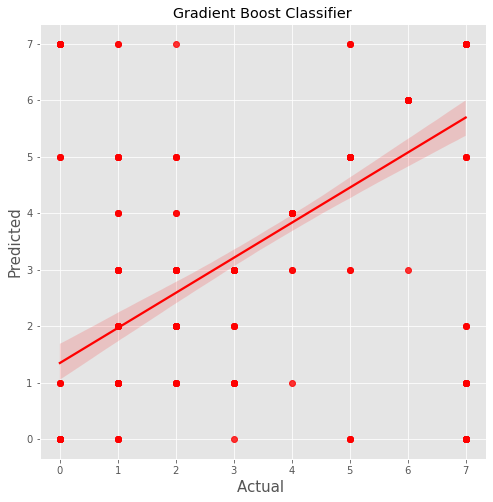

In [123]:
plt.figure(figsize=(8,8))
sns.regplot(cly_test,prediction,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title("Gradient Boost Classifier")
plt.show()

# Clonclusion:

## Our 1st model regression 'Capacity_model' achived an accuracy of 92.64%
## Our Second model Classification 'Fuel_Model' achived an accuracy of 81.77%